In [72]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_young_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [73]:
data

['t_n103        39.6104 (33.5355, 45.2302) (33.5955, 45.2840) 11.6885 (Jnode 202)\n',
 't_n104        34.2725 (27.3491, 41.5652) (27.3637, 41.5737) 14.2100 (Jnode 201)\n',
 't_n105        33.3276 (26.5717, 40.4651) (26.5085, 40.3904) 13.8819 (Jnode 200)\n',
 't_n106        29.9006 (23.7683, 36.4663) (23.7359, 36.4259) 12.6900 (Jnode 199)\n',
 't_n107        29.1349 (23.1487, 35.5611) (23.0356, 35.4437) 12.4081 (Jnode 198)\n',
 't_n108        27.3780 (21.7034, 33.5035) (21.6230, 33.4166) 11.7936 (Jnode 197)\n',
 't_n109        15.3595 (11.6771, 19.5426) (11.4740, 19.3054)  7.8314 (Jnode 196)\n',
 't_n110        15.2420 (11.5829, 19.3968) (11.4238, 19.2034)  7.7797 (Jnode 195)\n',
 't_n111        14.8979 (11.3176, 18.9713) (11.2282, 18.8591)  7.6309 (Jnode 194)\n',
 't_n112        14.4665 (10.9786, 18.4367) (10.8332, 18.2694)  7.4362 (Jnode 193)\n',
 't_n113        13.8075 (10.4624, 17.6237) (10.3526, 17.4842)  7.1316 (Jnode 192)\n',
 't_n114        10.2094 ( 7.4722, 13.4361) ( 7.3161, 1

In [74]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [75]:
model1_mean_times = {}
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    model1_mean_times[int(line[0][3:])] = float(line[1])
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [76]:
model1_mean_times

{103: 39.6104,
 104: 34.2725,
 105: 33.3276,
 106: 29.9006,
 107: 29.1349,
 108: 27.378,
 109: 15.3595,
 110: 15.242,
 111: 14.8979,
 112: 14.4665,
 113: 13.8075,
 114: 10.2094,
 115: 3.0377,
 116: 7.638,
 117: 6.2501,
 118: 10.8528,
 119: 9.1281,
 120: 14.2566,
 121: 13.7088,
 122: 7.9635,
 123: 10.9512,
 124: 9.1306,
 125: 7.7592,
 126: 13.4412,
 127: 12.6073,
 128: 3.4625,
 129: 14.6231,
 130: 13.2754,
 131: 9.6493,
 132: 8.9734,
 133: 7.6101,
 134: 10.4892,
 135: 8.426,
 136: 7.2106,
 137: 26.2623,
 138: 20.3161,
 139: 27.7766,
 140: 25.2525,
 141: 23.5308,
 142: 18.3692,
 143: 15.9836,
 144: 14.1745,
 145: 11.9848,
 146: 19.4626,
 147: 10.3116,
 148: 23.1166,
 149: 21.1836,
 150: 5.2853,
 151: 2.3728,
 152: 31.4031,
 153: 27.8991,
 154: 22.8108,
 155: 17.7039,
 156: 19.0864,
 157: 29.4238,
 158: 25.4683,
 159: 26.4926,
 160: 33.1898,
 161: 28.1655,
 162: 31.0611,
 163: 27.9751,
 164: 9.5723,
 165: 28.0152,
 166: 26.6035,
 167: 22.4573,
 168: 15.0268,
 169: 19.9256,
 170: 18.6764,


In [77]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [78]:
posterior_mean_iqtree

[39.6104,
 34.2725,
 33.3276,
 29.9006,
 29.1349,
 27.378,
 15.3595,
 15.242,
 14.8979,
 14.4665,
 13.8075,
 10.2094,
 3.0377,
 7.638,
 6.2501,
 10.8528,
 9.1281,
 14.2566,
 13.7088,
 7.9635,
 10.9512,
 9.1306,
 7.7592,
 13.4412,
 12.6073,
 3.4625,
 14.6231,
 13.2754,
 9.6493,
 8.9734,
 7.6101,
 10.4892,
 8.426,
 7.2106,
 26.2623,
 20.3161,
 27.7766,
 25.2525,
 23.5308,
 18.3692,
 15.9836,
 14.1745,
 11.9848,
 19.4626,
 10.3116,
 23.1166,
 21.1836,
 5.2853,
 2.3728,
 31.4031,
 27.8991,
 22.8108,
 17.7039,
 19.0864,
 29.4238,
 25.4683,
 26.4926,
 33.1898,
 28.1655,
 31.0611,
 27.9751,
 9.5723,
 28.0152,
 26.6035,
 22.4573,
 15.0268,
 19.9256,
 18.6764,
 17.9998,
 17.6285,
 16.7938,
 15.238,
 14.6522,
 14.1078,
 13.3377,
 12.3253,
 11.3983,
 9.8839,
 6.9679,
 12.5645,
 11.1675,
 9.9384,
 13.5338,
 12.3093,
 11.6032,
 9.2466,
 10.4587,
 12.0889,
 10.5362,
 8.8347,
 14.5652,
 12.8561,
 13.9207,
 13.2287,
 11.7227,
 8.7163,
 8.8161,
 7.337,
 2.5481,
 18.2025,
 15.3608]

In [79]:
lower_ci_iqtree

[]

In [80]:
upper_ci_iqtree

[]

In [81]:
file_LG = open("LG_G4_PM_codeml_young_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

model2_mean_times = {}
        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    model2_mean_times[int(line[0][3:])] = float(line[1])
    
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [82]:
model2_mean_times

{103: 36.9792,
 104: 28.1045,
 105: 26.9663,
 106: 24.8798,
 107: 24.1955,
 108: 23.0641,
 109: 12.4098,
 110: 12.337,
 111: 12.0481,
 112: 11.4985,
 113: 11.0286,
 114: 8.4351,
 115: 2.1084,
 116: 5.9317,
 117: 4.2088,
 118: 8.3708,
 119: 7.2591,
 120: 11.4537,
 121: 11.0048,
 122: 5.7771,
 123: 8.6668,
 124: 7.1389,
 125: 6.7682,
 126: 10.7213,
 127: 10.0049,
 128: 3.1769,
 129: 11.6231,
 130: 10.5561,
 131: 7.1673,
 132: 6.4051,
 133: 5.0754,
 134: 8.464,
 135: 6.7556,
 136: 4.2558,
 137: 21.5423,
 138: 18.5486,
 139: 22.9287,
 140: 21.0234,
 141: 19.4802,
 142: 16.1236,
 143: 13.9342,
 144: 12.3882,
 145: 10.3819,
 146: 16.4365,
 147: 9.8693,
 148: 19.5777,
 149: 17.7625,
 150: 4.8269,
 151: 2.1497,
 152: 24.8678,
 153: 22.1571,
 154: 18.9319,
 155: 15.0934,
 156: 15.7183,
 157: 23.3899,
 158: 20.717,
 159: 21.2706,
 160: 27.2311,
 161: 25.5576,
 162: 22.4722,
 163: 10.0701,
 164: 23.1143,
 165: 21.4578,
 166: 18.866,
 167: 16.3865,
 168: 14.4706,
 169: 23.2999,
 170: 16.4416,
 171

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [84]:
posterior_mean_baseml

[36.9792,
 28.1045,
 26.9663,
 24.8798,
 24.1955,
 23.0641,
 12.4098,
 12.337,
 12.0481,
 11.4985,
 11.0286,
 8.4351,
 2.1084,
 5.9317,
 4.2088,
 8.3708,
 7.2591,
 11.4537,
 11.0048,
 5.7771,
 8.6668,
 7.1389,
 6.7682,
 10.7213,
 10.0049,
 3.1769,
 11.6231,
 10.5561,
 7.1673,
 6.4051,
 5.0754,
 8.464,
 6.7556,
 4.2558,
 21.5423,
 18.5486,
 22.9287,
 21.0234,
 19.4802,
 16.1236,
 13.9342,
 12.3882,
 10.3819,
 16.4365,
 9.8693,
 19.5777,
 17.7625,
 4.8269,
 2.1497,
 24.8678,
 22.1571,
 18.9319,
 15.0934,
 15.7183,
 23.3899,
 20.717,
 21.2706,
 27.2311,
 25.5576,
 22.4722,
 10.0701,
 23.1143,
 21.4578,
 18.866,
 16.3865,
 14.4706,
 23.2999,
 16.4416,
 15.6471,
 15.1027,
 14.7735,
 13.4132,
 12.8288,
 12.3873,
 11.6469,
 10.7834,
 9.8888,
 8.6019,
 6.2795,
 10.6835,
 9.8045,
 8.8709,
 11.8545,
 10.6712,
 9.9764,
 8.1971,
 8.9856,
 10.5351,
 9.2613,
 7.6572,
 12.7027,
 11.1419,
 12.0383,
 11.0693,
 9.8564,
 7.2562,
 7.4927,
 4.6727,
 1.7097,
 15.4857,
 13.5294]

In [85]:
posterior_mean_iqtree

[39.6104,
 34.2725,
 33.3276,
 29.9006,
 29.1349,
 27.378,
 15.3595,
 15.242,
 14.8979,
 14.4665,
 13.8075,
 10.2094,
 3.0377,
 7.638,
 6.2501,
 10.8528,
 9.1281,
 14.2566,
 13.7088,
 7.9635,
 10.9512,
 9.1306,
 7.7592,
 13.4412,
 12.6073,
 3.4625,
 14.6231,
 13.2754,
 9.6493,
 8.9734,
 7.6101,
 10.4892,
 8.426,
 7.2106,
 26.2623,
 20.3161,
 27.7766,
 25.2525,
 23.5308,
 18.3692,
 15.9836,
 14.1745,
 11.9848,
 19.4626,
 10.3116,
 23.1166,
 21.1836,
 5.2853,
 2.3728,
 31.4031,
 27.8991,
 22.8108,
 17.7039,
 19.0864,
 29.4238,
 25.4683,
 26.4926,
 33.1898,
 28.1655,
 31.0611,
 27.9751,
 9.5723,
 28.0152,
 26.6035,
 22.4573,
 15.0268,
 19.9256,
 18.6764,
 17.9998,
 17.6285,
 16.7938,
 15.238,
 14.6522,
 14.1078,
 13.3377,
 12.3253,
 11.3983,
 9.8839,
 6.9679,
 12.5645,
 11.1675,
 9.9384,
 13.5338,
 12.3093,
 11.6032,
 9.2466,
 10.4587,
 12.0889,
 10.5362,
 8.8347,
 14.5652,
 12.8561,
 13.9207,
 13.2287,
 11.7227,
 8.7163,
 8.8161,
 7.337,
 2.5481,
 18.2025,
 15.3608]

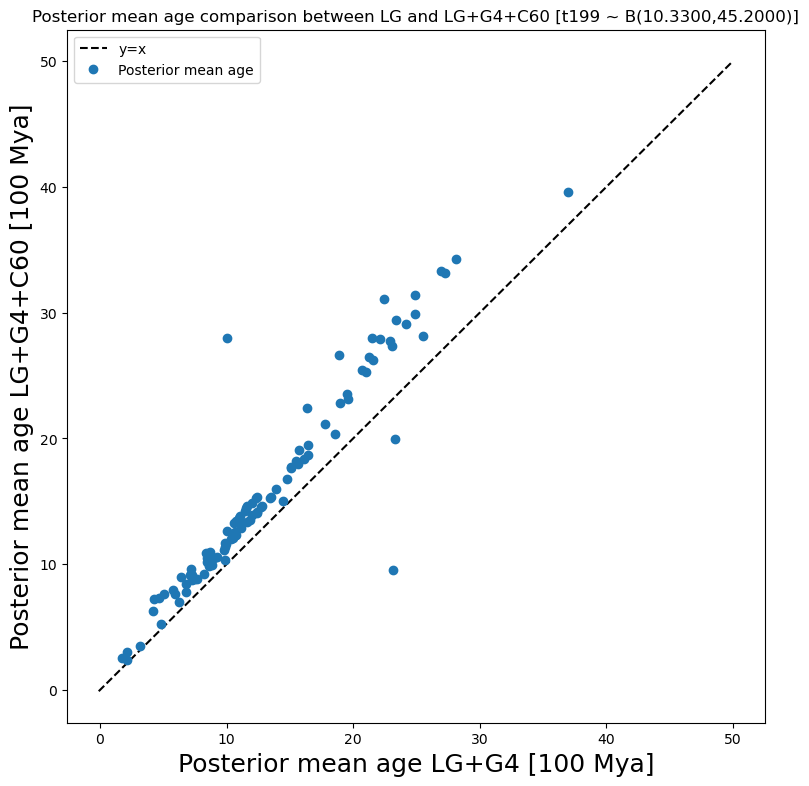

In [86]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()


In [87]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')

In [88]:
import copy
from ete3 import Tree

iqtree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4.tree"
mcmctree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_C60.tree"

tree_iqtree = Tree(iqtree_file)

iqtree_node_traversal = []
for node in tree_iqtree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    iqtree_node_traversal.append(node.name)

tree_mcmctree = Tree(mcmctree_file)

mcmctree_node_traversal = []
for node in tree_mcmctree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    mcmctree_node_traversal.append(node.name)



In [89]:
iqtree_node_traversal

['Volvox:Galdieria:Aeropyrum_pernix:Chlorobium:Ar5:Escherichia_coli:Caldithrix:Hyperthermus_butylicus:Gemmatimonas:Latescibacteria:Ignicoccus_hospitalis:Fibrobacter:Haloarcula_marismortui:Cenarchaeum_symbiosum:Methanococcus_jannaschii:Lentisphaera:Nanosalina:Verrucomicrobium:Methanopyrus_kandleri:Chlamydia_trachomatis:Pyrococcus_furiosus:Rhodopirellula_baltica:Elusimicrobium:Tetrahymena:Lokiarchaeum:Agaricus:Clostridium_acetobutylicum:Korarchaeum_cryptofilum:Treponema_pallidum:Loki3:Thermodesulfovibrio:Chthonomonas:Loki2:Thermoplasma_volcanium:Aquifex:Rickettsia:Oscillochloris:Parvarchaeum_acidophilus:Microgenomates:Parcubacteria:Actinomadura:Paramecium:Ar13:Acidobacterium:Rhodopseudomonas_palustris:Cylindrosperopsis:Chlorogloeopsis:Synechocystis_sp._PCC6803:Desulfurispirillum:Gloeobacter:Candidatus:Chondrus:Campylobacter_jejuni:Jonquetella:Thermodesulfatator:Ar15:Cyanophora:Dictyoglomus:Nanoarchaeum:Caldisericum:Kosmotoga:Amphimedon:Hydra:Homo_sapiens:Limulus:Staphylothermus_marinus:E

In [90]:
mcmctree_node_traversal

['Volvox:Leishmania_major:Bodo:Ar6:Trichomonas_vaginalis:Ar13:Giardia_lamblia:Ar15:DUSEL4:Parvarchaeum_acidophilus:Nanoarchaeum:Limulus:Homo_sapiens:Hydra:Amphimedon:Parcubacteria:Microgenomates:Agaricus:Saccharomyces_cerevisiae:Batrachochytrium:Polysphondylium:Dictyostelium_discoideum:Rhodopseudomonas_palustris:Rickettsia:Escherichia_coli:Treponema_pallidum:Lokiarchaeum:Campylobacter_jejuni:Loki2:Desulfurispirillum:Chthonomonas:Loki3:Acidobacterium:Thermodesulfatator:Thermodesulfovibrio:Aquifex:Hyperthermus_butylicus:Aeropyrum_pernix:Ignicoccus_hospitalis:Staphylothermus_marinus:Chlorobium:Sulfolobus_solfataricus:Caldithrix:Cylindrosperopsis:Gemmatimonas:Caldivirga_maquilingensis:Latescibacteria:Pyrobaculum_aerophilum:Fibrobacter:Thermofilum_pendens:Crenynpffa:Lentisphaera:The09:Verrucomicrobium:Chlamydia_trachomatis:Cenarchaeum_symbiosum:Rhodopirellula_baltica:Elusimicrobium:Nitrosopumilus_maritimus:Nitrosoarchaeum_limnia:Caldiarchaeum_subterraneum:Clostridium_acetobutylicum:Korarcha

In [91]:
LG_G4_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_times_index.tree"
LG_G4_C60_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_C60_times_index.tree"
# Load the tree using ETE3
tree1 = Tree(LG_G4_index_tree)
tree2 = Tree(LG_G4_C60_index_tree)


# Function to traverse the tree and populate the dictionary
def traverse_and_collect(node, clade_values):
    if not node.is_leaf():
        clade_name = node.name if node.name else "root"
        # Retrieve the support value (if exists)
        if clade_name == "root":
            clade_name = "root:1"
        support_value = node.support if node.support else None
        clade_values[clade_name] = support_value
        for child in node.get_children():
            # print(child)
            # print(child.get_leaf_names())
            child_names = child.get_leaf_names()
            cleaned_child_names = ["_".join(name.split('_')[1:]) for name in child_names]
            cleaned_child_names.sort()
            final_child_name = ":".join(cleaned_child_names)+":"+str(len(cleaned_child_names))
            support_value = node.support if node.support else None
            # print(support_value)
            clade_values[final_child_name] = support_value
            traverse_and_collect(child, clade_values)



In [92]:
# Start the traversal from the root
clade_values_tree1 = {}

traverse_and_collect(tree1, clade_values_tree1)

# Display the clade names with their associated values
for clade, value in clade_values_tree1.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 203.0
Clade: Aeropyrum_pernix:Agaricus:Amphimedon:Ar13:Ar15:Ar5:Ar6:Arabidopsis_thaliana:Archaeoglobus_fulgidus:Batrachochytrium:Bodo:Caldiarchaeum_subterraneum:Caldivirga_maquilingensis:Cenarchaeum_symbiosum:Chlamydomonas:Chondrus:Crenynpffa:Cyanidioschyzon:Cyanophora:DUSEL3:DUSEL4:Dictyostelium_discoideum:Ectocarpus:Elphidium:Galdieria:Giardia_lamblia:Haloarcula_marismortui:Homo_sapiens:Hydra:Hyperthermus_butylicus:Ignicoccus_hospitalis:Korarchaeum_cryptofilum:Leishmania_major:Limulus:Loki2:Loki3:Lokiarchaeum:Methanococcus_jannaschii:Methanomassiliicoccus_luminyensis:Methanopyrus_kandleri:Methanosarcina_mazei:Methanothermobacter_thermautotro:Micrarchaeum_acidiphilum:Nanoarchaeum:Nanosalina:Nanosalinarum:Nitrosoarchaeum_limnia:Nitrosopumilus_maritimus:Oryza_sativa:Paramecium:Parvarchaeum_acidophilus:Physcomitrella:Phytophthora_ramorum:Polysphondylium:Pyrobaculum_aerophilum:Pyrococcus_furiosus:Reticulomyxa:Saccharomyces_cerevisiae:Staphylothermus_marinus:S

In [93]:
# Start the traversal from the root
clade_values_tree2 = {}

traverse_and_collect(tree2, clade_values_tree2)

# Display the clade names with their associated values
for clade, value in clade_values_tree2.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 203.0
Clade: Aeropyrum_pernix:Agaricus:Amphimedon:Ar13:Ar15:Ar5:Ar6:Arabidopsis_thaliana:Archaeoglobus_fulgidus:Batrachochytrium:Bodo:Caldiarchaeum_subterraneum:Caldivirga_maquilingensis:Cenarchaeum_symbiosum:Chlamydomonas:Chondrus:Crenynpffa:Cyanidioschyzon:Cyanophora:DUSEL3:DUSEL4:Dictyostelium_discoideum:Ectocarpus:Elphidium:Galdieria:Giardia_lamblia:Haloarcula_marismortui:Homo_sapiens:Hydra:Hyperthermus_butylicus:Ignicoccus_hospitalis:Korarchaeum_cryptofilum:Leishmania_major:Limulus:Loki2:Loki3:Lokiarchaeum:Methanococcus_jannaschii:Methanomassiliicoccus_luminyensis:Methanopyrus_kandleri:Methanosarcina_mazei:Methanothermobacter_thermautotro:Micrarchaeum_acidiphilum:Nanoarchaeum:Nanosalina:Nanosalinarum:Nitrosoarchaeum_limnia:Nitrosopumilus_maritimus:Oryza_sativa:Paramecium:Parvarchaeum_acidophilus:Physcomitrella:Phytophthora_ramorum:Polysphondylium:Pyrobaculum_aerophilum:Pyrococcus_furiosus:Reticulomyxa:Saccharomyces_cerevisiae:Staphylothermus_marinus:S

In [94]:
diff_indexes = []
for clade, value in clade_values_tree1.items():
    names = clade.split(":")
    len_of_clade = int(names[-1])
    for clade2, value2 in clade_values_tree2.items():
        names2 = clade2.split(":")
        len_of_clade2 = int(names2[-1])
        if clade == clade2 and value != value2:
           print(f"Clade: {clade}, Support Value LG_G4: {value}, Support Value LG_G4_C60: {value2}")
           diff_indexes.append([int(value), int(value2)])

Clade: Ar5:Nanosalina:Nanosalinarum:3, Support Value LG_G4: 161.0, Support Value LG_G4_C60: 162.0
Clade: Ar5:1, Support Value LG_G4: 162.0, Support Value LG_G4_C60: 163.0
Clade: Nanosalina:Nanosalinarum:2, Support Value LG_G4: 162.0, Support Value LG_G4_C60: 163.0
Clade: Nanosalina:1, Support Value LG_G4: 163.0, Support Value LG_G4_C60: 164.0
Clade: Nanosalinarum:1, Support Value LG_G4: 163.0, Support Value LG_G4_C60: 164.0
Clade: Ar13:Ar15:Ar6:DUSEL4:Nanoarchaeum:Parvarchaeum_acidophilus:6, Support Value LG_G4: 161.0, Support Value LG_G4_C60: 162.0
Clade: Ar13:Ar15:Ar6:DUSEL4:Parvarchaeum_acidophilus:5, Support Value LG_G4: 164.0, Support Value LG_G4_C60: 165.0
Clade: Ar13:Ar15:Ar6:DUSEL4:4, Support Value LG_G4: 165.0, Support Value LG_G4_C60: 166.0
Clade: Ar15:DUSEL4:2, Support Value LG_G4: 166.0, Support Value LG_G4_C60: 167.0
Clade: DUSEL4:1, Support Value LG_G4: 167.0, Support Value LG_G4_C60: 169.0
Clade: Ar15:1, Support Value LG_G4: 167.0, Support Value LG_G4_C60: 169.0
Clade: A

In [95]:
diff_indexes

[[161, 162],
 [162, 163],
 [162, 163],
 [163, 164],
 [163, 164],
 [161, 162],
 [164, 165],
 [165, 166],
 [166, 167],
 [167, 169],
 [167, 169],
 [166, 167],
 [165, 166],
 [164, 165],
 [169, 161],
 [169, 161]]

In [96]:
len(diff_indexes)

16

In [97]:
unique_data = [list(t) for t in set(tuple(inner) for inner in diff_indexes)]

# Print the result
print(unique_data)

[[163, 164], [167, 169], [164, 165], [166, 167], [169, 161], [165, 166], [162, 163], [161, 162]]


In [98]:
model2_keys = [i[0] for i in unique_data]
model1_keys = [i[1] for i in unique_data]

In [99]:
model2_keys

[163, 167, 164, 166, 169, 165, 162, 161]

In [100]:
model1_keys

[164, 169, 165, 167, 161, 166, 163, 162]

In [101]:
mapped_keys = {}
for i in range(len(model2_keys)):
    mapped_keys[model2_keys[i]] = model1_keys[i]

In [102]:
mapped_keys

{163: 164,
 167: 169,
 164: 165,
 166: 167,
 169: 161,
 165: 166,
 162: 163,
 161: 162}

In [103]:
model1_revised_times = {}
for key, value in model1_mean_times.items():
    if key in model1_keys:
        model1_revised_times[key] = model1_mean_times[mapped_keys[key]]
    else:
        model1_revised_times[key] = value

In [104]:
model1_revised_times

{103: 39.6104,
 104: 34.2725,
 105: 33.3276,
 106: 29.9006,
 107: 29.1349,
 108: 27.378,
 109: 15.3595,
 110: 15.242,
 111: 14.8979,
 112: 14.4665,
 113: 13.8075,
 114: 10.2094,
 115: 3.0377,
 116: 7.638,
 117: 6.2501,
 118: 10.8528,
 119: 9.1281,
 120: 14.2566,
 121: 13.7088,
 122: 7.9635,
 123: 10.9512,
 124: 9.1306,
 125: 7.7592,
 126: 13.4412,
 127: 12.6073,
 128: 3.4625,
 129: 14.6231,
 130: 13.2754,
 131: 9.6493,
 132: 8.9734,
 133: 7.6101,
 134: 10.4892,
 135: 8.426,
 136: 7.2106,
 137: 26.2623,
 138: 20.3161,
 139: 27.7766,
 140: 25.2525,
 141: 23.5308,
 142: 18.3692,
 143: 15.9836,
 144: 14.1745,
 145: 11.9848,
 146: 19.4626,
 147: 10.3116,
 148: 23.1166,
 149: 21.1836,
 150: 5.2853,
 151: 2.3728,
 152: 31.4031,
 153: 27.8991,
 154: 22.8108,
 155: 17.7039,
 156: 19.0864,
 157: 29.4238,
 158: 25.4683,
 159: 26.4926,
 160: 33.1898,
 161: 31.0611,
 162: 27.9751,
 163: 9.5723,
 164: 28.0152,
 165: 26.6035,
 166: 22.4573,
 167: 19.9256,
 168: 15.0268,
 169: 28.1655,
 170: 18.6764,


In [105]:
model1_mean_posterior_times = np.array(list(model1_revised_times.values()))
model2_mean_posterior_times = np.array(list(model2_mean_times.values()))

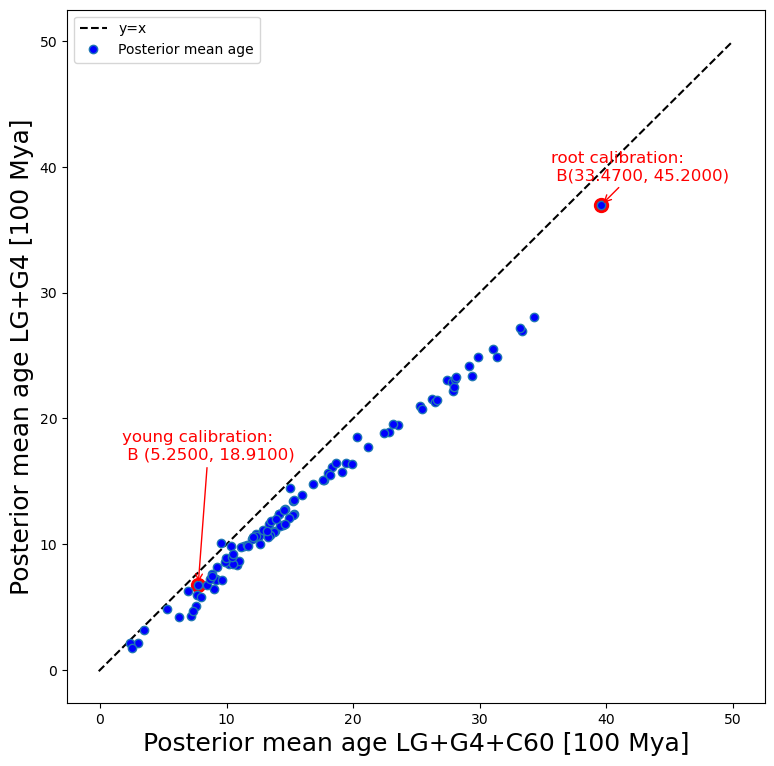

In [106]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
points = ax.plot(model1_mean_posterior_times, model2_mean_posterior_times, 'o', label='Posterior mean age')
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[22], posterior_mean_baseml[22], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(33.4700, 45.2000)', 
        xy=(model1_mean_posterior_times[0], model2_mean_posterior_times[0]), 
        xytext=(model1_mean_posterior_times[0] -4,  model2_mean_posterior_times[0] + 2),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('young calibration:\n B (5.2500, 18.9100)', 
        xy=(model1_mean_posterior_times[22], model2_mean_posterior_times[22]), 
        xytext=(model1_mean_posterior_times[22] -6,  model2_mean_posterior_times[22] + 10),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# Labels and title
ax.set_xlabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_young_scatter.png')